In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from scipy.signal import savgol_filter

In [2]:
df_Incidence = pd.read_csv("../Data/Incidence.csv")
df_Entities = pd.read_csv("../Data/Entidades.csv")



In [62]:
Lag = 72

Entities = list(df_Entities.Entidad)
Incidences = []
Rates = []
trst = 14
for entity in Entities:
    result = savgol_filter(df_Incidence[entity], 21, 2)
    model_fit = AutoReg(result[:-trst], lags=7, trend='c').fit()
    predictions = model_fit.predict(start=Lag-trst, end=Lag-1)
    Incidences.append(sum(predictions[-7:]))
    Rates.append(sum(predictions[-7:])/sum(predictions[-14:-7]) - 1)

df_Entities['Incidencia Semanal'] = Incidences
df_Entities['Incidencia Semanal Normalizada'] = df_Entities['Incidencia Semanal']/df_Entities['Población']*1e5
df_Entities['Tasa de Cambio'] = Rates


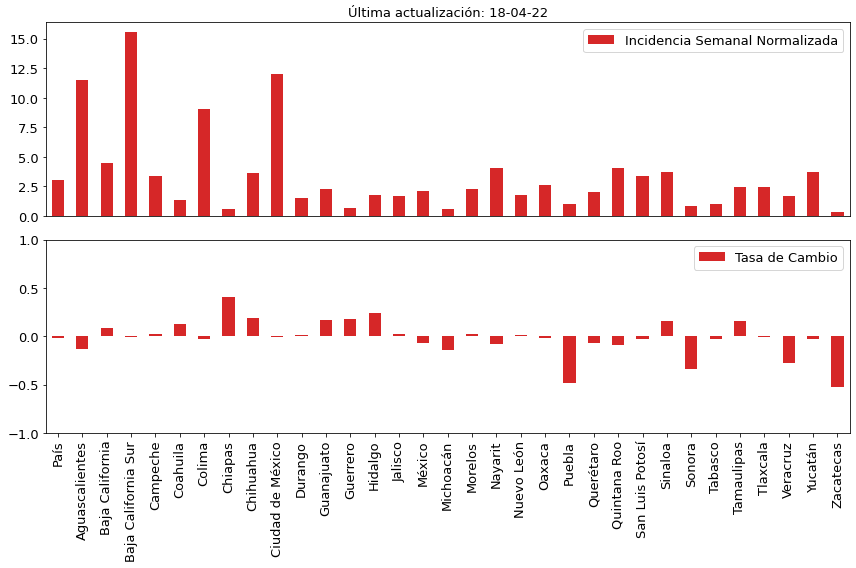

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
df_Entities.plot.bar(x='Entidad', y='Incidencia Semanal Normalizada', color='C3', ax=axs[0])
axs[0].set_title('Última actualización: '+pd.to_datetime('today').strftime('%d-%m-%y'), fontsize=13)
axs[0].set_xlabel('')
axs[0].set_xticks([])
axs[0].yaxis.set_tick_params(labelsize=13)
axs[0].legend(fontsize=13)
df_Entities.plot.bar(x='Entidad', y='Tasa de Cambio', color='C3', ax=axs[1])
axs[1].set_ylim([-1, 1])
axs[1].set_xlabel('')
axs[1].xaxis.set_tick_params(labelsize=13)
axs[1].yaxis.set_tick_params(labelsize=13)
axs[1].legend(fontsize=13)
fig.tight_layout()


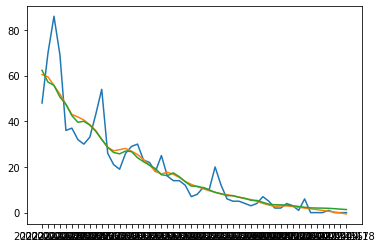

In [55]:
entity = "Tlaxcala"
Lag = 72
trst = 14

plt.plot(df_Incidence.Date[20:], df_Incidence[entity][20:])
result = savgol_filter(df_Incidence[entity], 21, 2)
plt.plot(df_Incidence.Date[20:], result[20:])
model_fit = AutoReg(result[:-trst], lags=7, trend='n').fit()
predictions = model_fit.predict(start=20, end=Lag-1)
plt.plot(df_Incidence.Date[20:], predictions)



In [ ]:
"
Lag = 72
trst = 14

plt.plot(df_Incidence.Date[20:], df_Incidence[entity][20:])
result = savgol_filter(df_Incidence[entity], 21, 3)
plt.plot(df_Incidence.Date[20:], result[20:])
model_fit = AutoReg(result[:-trst], lags=7, trend='t').fit()
predictions = model_fit.predict(start=Lag-trst, end=Lag-1)
plt.plot(df_Incidence.Date[-trst:], predictions)



In [137]:
predictions

array([ 1.47089707,  1.2318872 ,  1.26859362,  1.21084302,  1.04769835,
        0.72472206,  0.44157695,  0.27600625,  0.1037018 , -0.04878156,
       -0.2125362 , -0.45210282, -0.69858316, -0.92253418])